In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Model,Input
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D,Input,AveragePooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.models import *
from keras.preprocessing import *
from keras.layers import *
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import DenseNet121

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:9UrtWFvMjXlS68tAtVKsAsmKsX/Vae4is28PBNUg6VU root@4ef22e11f06f
The key's randomart image is:
+---[RSA 4096]----+
|         ..o+E   |
|        ..+. ..  |
|     .  .=o    +.|
|      + .ooo.o==o|
|     o .S .++BBoo|
|      .  .o==ooo |
|       . .o.oo . |
|        .o oo o .|
|         .*.oo o |
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-01b97e8f


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDM5U0j/DWIa6BgggCPzp0YIn/AvXmgFjcBM2fSksqfyvacm/IJ+dAxkEoaxKwa9RZ/l2QFsIkXExUb9Eo8VANPL3vOPoAYdcWKrAeI7fnzhKWxu5uxw0zBtYsuB+gkwrc2OAmCHkmgJ3vvcGrm6CerIXEf5I8mAhycxfxXSMmqW+v90UFLC+WcD23p1F2HJgAAn/vkocv1oP8dXVy8EkwWw6c3J4IoB0qx3C8eGKf/FchYxyiz6jTkfy1m25yoICHQQs445RWyLknhITT9SuAYYDFMNWZrKGoXAamNwbUe8isr9eV8oitaotnNLCnQ2xK7yAXF8dr1yVnUvEEQX/1pvBpjitnTIlO72dTqWz5y6OW6cPQrG1PINJKCt+fPJQjMZcNjqkyYTY+d7NIaBWnUCQaY29mojidbeV3tVsfFRcxwK8VrAea3ktHwkHqPoh5LZiUNtqbvgFW4/4pAL5YIupftGKspCEiEeU8rKqQeHpAGPQm08Mqx9UFVPIwImAXfN4ztPJgK8TZtlt33CL9XzuF8bTb8emI6daTKUBdF822ENGLm9HqkpqMqxQaQcdm9skqDLdRNPZdrehL5LMARC0Hn98zPTAio/LMZL3eWMEyiOXU2QxuxFmIwW5EyEbMrmaS5DIZX+HgA7R5hinBtyw5/OmuicH0y99XsqCRgZw== root@4ef22e11f06f


In [ ]:
!ssh -T git@github.com

git@github.com: Permission denied (publickey).


In [ ]:
!git config --global user.email "busedbilek@gmail.com"
!git config --global user.name "busedemirbilek"

In [ ]:
!git clone git@github.com:busedemirbilek/Covid19-Detection-Using-Chest-X-Ray.git

Cloning into 'Covid19-Detection-Using-Chest-X-Ray'...
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import np_utils

generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
trainGen = generator.flow_from_directory(
    "./drive/MyDrive/train",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)
valGen = generator.flow_from_directory(
    "./drive/MyDrive/val",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)
testGen = generator.flow_from_directory(
    "./drive/MyDrive/test",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1
)
print("Train:",trainGen.class_indices)
print("Test:",testGen.class_indices)
print("Val:",valGen.class_indices)

Found 7401 images belonging to 4 classes.
Found 920 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Train: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}
Test: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}
Val: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}


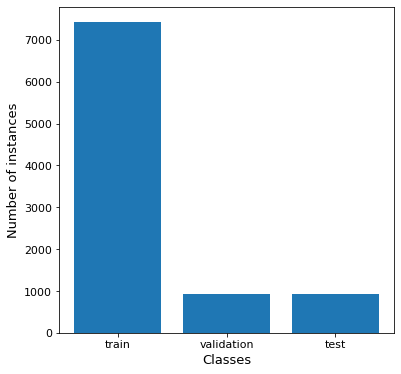

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(['train','validation','test'],[len(trainGen)*32,
                                       len(valGen)*32,
                                       len(testGen)])
plt.xlabel("Classes",size=13)
plt.ylabel("Number of instances",size=13)
plt.tick_params(which='both',axis='both',labelsize=11)
plt.show()

In [ ]:
#sınıflandırma problemlemi,çok sınıf tek etiket
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
preds=Dense(4,activation='softmax')(x)

model=Model(inputs=model_d.input,outputs=preds)
model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                             

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
    trainGen,
    validation_data=valGen,
    epochs=10,
    batch_size=32
) 

Epoch 1/10
232/232 [==============================] - 1808s 7s/step - loss: 0.7955 - accuracy: 0.7321 - val_loss: 0.4662 - val_accuracy: 0.8141
Epoch 2/10
232/232 [==============================] - 1194s 5s/step - loss: 0.5688 - accuracy: 0.7796 - val_loss: 0.4220 - val_accuracy: 0.8380
Epoch 3/10
232/232 [==============================] - 1197s 5s/step - loss: 0.5092 - accuracy: 0.7933 - val_loss: 0.4087 - val_accuracy: 0.8435
Epoch 4/10
232/232 [==============================] - 1197s 5s/step - loss: 0.4818 - accuracy: 0.8060 - val_loss: 0.3928 - val_accuracy: 0.8391
Epoch 5/10
232/232 [==============================] - 1199s 5s/step - loss: 0.4784 - accuracy: 0.8098 - val_loss: 0.3779 - val_accuracy: 0.8554
Epoch 6/10
232/232 [==============================] - 1198s 5s/step - loss: 0.4606 - accuracy: 0.8098 - val_loss: 0.3794 - val_accuracy: 0.8500
Epoch 7/10
232/232 [==============================] - 1202s 5s/step - loss: 0.4561 - accuracy: 0.8108 - val_loss: 0.3610 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


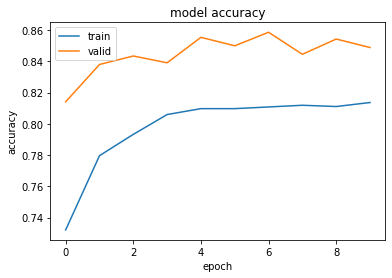

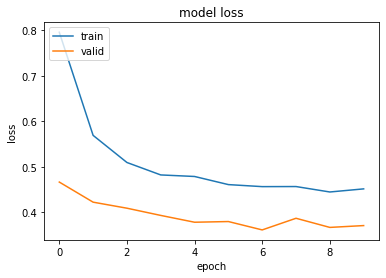

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
train_accu=model.evaluate(trainGen)
print("The training accuracy is: ",train_accu[1]*100,"%")
test_accu=model.evaluate(testGen)
print("The testing accuracy is: ",test_accu[1]*100,"%")

232/232 [==============================] - 1349s 6s/step - loss: 0.3433 - accuracy: 0.8514
The training accuracy is:  85.13714075088501 %
924/924 [==============================] - 348s 376ms/step - loss: 0.3597 - accuracy: 0.8604
The testing accuracy is:  86.03895902633667 %


In [ ]:
testGen.reset()
X_test, y_test = next(testGen)
for i in range(int(len(testGen))-1): 
  img, label = next(testGen)
  X_test= np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(924, 224, 224, 3) (924, 4)


In [ ]:
pred=model.predict(X_test,batch_size=1,verbose=1)
print(np.argmax(pred[0]))

924/924 [==============================] - 136s 148ms/step
2


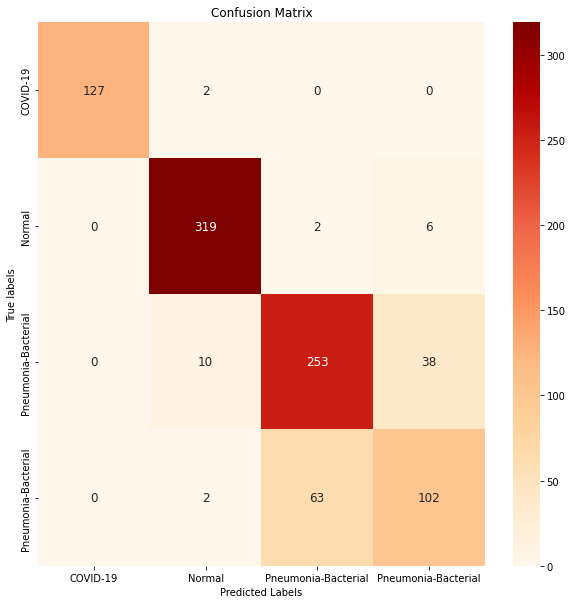

In [ ]:
#confusion matrix olusturma
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

y_pred = [np.argmax(i) for i in pred]
y_pred=tf.keras.utils.to_categorical(y_pred)

import seaborn as sns

lables = ['COVID-19','Normal','Pneumonia-Bacterial','Pneumonia-Viral']    
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g',cmap='OrRd',cbar=True,annot_kws={"size": 12}, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables,); ax.yaxis.set_ticklabels(lables)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['COVID','Lung Opacity','Pneumonia-Bacterial','Pneumonia-Viral']))

                     precision    recall  f1-score   support

              COVID       0.98      0.98      0.98       129
       Lung Opacity       0.95      0.96      0.96       327
Pneumonia-Bacterial       0.77      0.85      0.81       301
    Pneumonia-Viral       0.65      0.53      0.58       167

          micro avg       0.85      0.85      0.85       924
          macro avg       0.84      0.83      0.83       924
       weighted avg       0.84      0.85      0.84       924
        samples avg       0.85      0.85      0.85       924



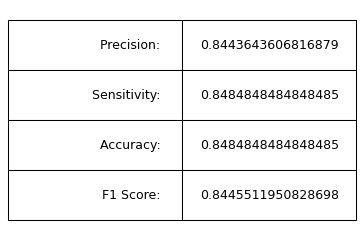

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import sensitivity_score 
import matplotlib.pyplot as plt 
from imblearn.metrics import specificity_score
fig = plt.figure(dpi=75)
ax = fig.add_subplot(1,1,1)
table=[
    ["Precision: ", precision_score(y_test, y_pred,average='weighted')],
    ["Sensitivity: ", recall_score(y_test, y_pred ,average='weighted')],
    ["Accuracy: ", accuracy_score(y_test, y_pred)],
    ["F1 Score: ", f1_score(y_test, y_pred,average='weighted')],
]
table = ax.table(cellText=table, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.show()